<a href="https://colab.research.google.com/github/sarahhasan1212/DataScienceProject3/blob/main/SaraMiniProject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFLUENTIAL ARTISTS NetworkX**

In [125]:
import csv
import os
import sys
import json
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
import numpy as np
import matplotlib.pyplot as plt

In [126]:
import pandas as pd

# Read the uploaded CSV files into dataframes
nodereader = pd.read_csv('artists.csv')
edgereader = pd.read_csv('relationships.csv')

In [127]:
nodes = [n for n in nodereader][1:]
node_names = nodereader.iloc[:, 0].tolist()

In [128]:
edges_df = edgereader.fillna('')

In [129]:
# Convert each row to a tuple with the first two columns for edges
edges = [(row[0], row[1]) for row in edges_df[[edges_df.columns[0], edges_df.columns[1]]].values]

In [130]:
# Build the graph
G = nx.Graph()  # or nx.DiGraph() for directed graphs
G.add_nodes_from(node_names)
G.add_edges_from(edges)

In [131]:
print(len(node_names))

2996


In [132]:
print(len(edges))

2996


In [133]:

edges = []
for _, row in edges_df.iterrows():
    artist = row['artistUrl']
    influenced_on = row['influenced_on']

    # Clean the influenced_on column and add edge tuple
    if influenced_on:
        influenced_artists = influenced_on.split(',')
        for influenced_artist in influenced_artists:
            influenced_artist = influenced_artist.strip()
            edges.append((artist, influenced_artist))

# Build the directed graph
G = nx.DiGraph()
# Add artist nodes
G.add_nodes_from(node_names)
# Add edges from the relationships
G.add_edges_from(edges)

# Analyze the graph to find the most influential artists
artist_influence = {}
for node in G.nodes(data=True):
    if node[1].get('type') == 'artist' or node[0] in node_names:
        artist_influence[node[0]] = G.out_degree(node[0])

# Convert to DataFrame for easier handling and sorting
artist_df = pd.DataFrame(artist_influence.items(), columns=['Artist', 'Influenced Count'])

# Sort the DataFrame by the number of influenced relationships
artist_df = artist_df.sort_values(by='Influenced Count', ascending=False)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

# Print the results
print("Most influential artists based on influenced_on relationships:")
print(artist_df.to_string(index=False))


Number of nodes: 3093
Number of edges: 1204
Most influential artists based on influenced_on relationships:
                                     Artist  Influenced Count
                          /en/pablo-picasso                24
                           /en/paul-cezanne                22
                              /en/rembrandt                21
                             /en/caravaggio                21
                                 /en/titian                17
                        /en/gustave-courbet                17
                        /en/nicolas-poussin                16
                        /en/diego-velazquez                16
                                /en/raphael                15
                          /en/henri-matisse                15
                           /en/michelangelo                15
                       /en/vincent-van-gogh                12
                   /en/jean-francois-millet                12
                         

In [134]:
# Community Detection
communities = list(nx.algorithms.community.greedy_modularity_communities(G.to_undirected()))

# Count the number of communities detected
num_communities = len(communities)
print(f"\nNumber of detected communities: {num_communities}")

# Identify the biggest community
biggest_community = max(communities, key=len)  # Community with the most members
biggest_community_size = len(biggest_community)

print(f"Biggest community (size {biggest_community_size}): {list(biggest_community)}")


Number of detected communities: 2426
Biggest community (size 123): ['/en/jean-joseph-xavier-bidauld', '/en/alexander-ivanov', '/en/jan-cossiers', '/en/maurice-poirson', '/en/thomas-cole', '/en/francois-boucher', '/en/tintoretto', '/en/thomas-gainsborough', '/en/andrea-mantegna', '/en/aaron-shikler', '/en/henry-scott-tuke', '/en/judith-leyster', '/en/artemisia-gentileschi', '/en/artists-by-painting-school/barbizon-school', '/en/frans-hals', '/en/louise-abbema', '/en/hendrick-goltzius', '/en/michelangelo', '/en/samuel-dirksz-van-hoogstraten', '/en/artists-by-art-movement/romanticism', '/en/jozef-pankiewicz', '/en/henri-gervex', '/en/john-singer-sargent', '/en/mary-cassatt', '/en/auguste-rodin', '/en/maarten-de-vos', '/en/francesco-ribalta', '/en/georges-de-la-tour', '/en/james-tissot', '/en/artists-by-painting-school/hudson-river-school', '/en/jusepe-de-ribera', '/en/hendrick-terbrugghen', '/en/childe-hassam', '/en/edgar-degas', '/en/artists-by-painting-school/peredvizhniki-society-for-

In [135]:
import pandas as pd
import networkx as nx


# Initialize a directed graph
G = nx.DiGraph()

# Build the edges from the edges_df DataFrame
for _, row in edges_df.iterrows():
    artist = row['artistUrl']
    influenced_on = row['influenced_on']

    # Ensure artist is added to the graph
    G.add_node(artist, type='artist')

    # Clean the influenced_on column and add edges
    if pd.notna(influenced_on):
        influenced_artists = [influenced.strip() for influenced in influenced_on.split(',')]
        for influenced_artist in influenced_artists:
            G.add_node(influenced_artist)  # Ensure influenced artist is also a node
            G.add_edge(artist, influenced_artist)

# Community Detection
communities = list(nx.algorithms.community.greedy_modularity_communities(G))

# Print communities and their influenced artists
for i, community in enumerate(communities):
    print(f"\nCommunity {i + 1}:")
    for artist in community:
        # Get influenced artists for the current artist
        influenced_artists = list(G.successors(artist))  # Get influenced artists
        influenced_on_str = ', '.join(influenced_artists) if influenced_artists else "None"
        print(f"  Artist: {artist} - Influenced Artists: {influenced_on_str}")



Community 1:
  Artist:  - Influenced Artists: None
  Artist: /en/marie-gabrielle-capet-0 - Influenced Artists: 
  Artist: /en/christopher-wilmarth - Influenced Artists: 
  Artist: /en/peter-max - Influenced Artists: 
  Artist: /en/frantisek-hudecek - Influenced Artists: 
  Artist: /en/brice-marden - Influenced Artists: 
  Artist: /en/francesco-botticini - Influenced Artists: 
  Artist: /en/john-russell - Influenced Artists: 
  Artist: /en/wanda-koop - Influenced Artists: 
  Artist: /en/heinz-mack - Influenced Artists: 
  Artist: /en/enrico-nardi - Influenced Artists: 
  Artist: /en/li-chevalier - Influenced Artists: 
  Artist: /en/dosso-dossi - Influenced Artists: 
  Artist: /en/hiro-yamagata - Influenced Artists: 
  Artist: /en/luca-di-tomme - Influenced Artists: 
  Artist: /en/tetsuya-ishida - Influenced Artists: 
  Artist: /en/lucas-cranach-the-elder - Influenced Artists: 
  Artist: /en/pol-bury - Influenced Artists: 
  Artist: /en/sorin-ilfoveanu - Influenced Artists: 
  Artist: /

In [ ]:
import pandas as pd
import networkx as nx


# Initialize a directed graph
G = nx.DiGraph()

# Build the edges from the edges_df DataFrame
for _, row in edges_df.iterrows():
    artist = row['artistUrl']
    influenced_on = row['influenced_on']

    # Ensure artist is added to the graph
    G.add_node(artist, type='artist')

    # Clean the influenced_on column and add edges
    if pd.notna(influenced_on):
        influenced_artists = [influenced.strip() for influenced in influenced_on.split(',')]
        for influenced_artist in influenced_artists:
            G.add_node(influenced_artist)  # Ensure influenced artist is also a node
            G.add_edge(artist, influenced_artist)

# Community Detection
communities = list(nx.algorithms.community.greedy_modularity_communities(G))

# Sort communities by size (number of artists in each community)
communities_sorted = sorted(communities, key=len, reverse=True)

# Print the largest community and its size
largest_community = communities_sorted[0]  # Largest community
largest_community_size = len(largest_community)  # Size of the largest community
print(f"\nLargest Community (Size: {largest_community_size}):")
for artist in largest_community:
    influenced_artists = list(G.successors(artist))  # Get influenced artists
    influenced_on_str = ', '.join(influenced_artists) if influenced_artists else "None"
    print(f"  Artist: {artist} - Influenced Artists: {influenced_on_str}")

# Print the second largest community if it exists
if len(communities_sorted) > 1:
    second_largest_community = communities_sorted[1]
    second_largest_community_size = len(second_largest_community)
    print(f"\nSecond Largest Community (Size: {second_largest_community_size}):")
    for artist in second_largest_community:
        influenced_artists = list(G.successors(artist))
        influenced_on_str = ', '.join(influenced_artists) if influenced_artists else "None"
        print(f"  Artist: {artist} - Influenced Artists: {influenced_on_str}")



Largest Community (Size: 2380):
  Artist:  - Influenced Artists: None
  Artist: /en/marie-gabrielle-capet-0 - Influenced Artists: 
  Artist: /en/christopher-wilmarth - Influenced Artists: 
  Artist: /en/peter-max - Influenced Artists: 
  Artist: /en/frantisek-hudecek - Influenced Artists: 
  Artist: /en/brice-marden - Influenced Artists: 
  Artist: /en/francesco-botticini - Influenced Artists: 
  Artist: /en/john-russell - Influenced Artists: 
  Artist: /en/wanda-koop - Influenced Artists: 
  Artist: /en/heinz-mack - Influenced Artists: 
  Artist: /en/enrico-nardi - Influenced Artists: 
  Artist: /en/li-chevalier - Influenced Artists: 
  Artist: /en/dosso-dossi - Influenced Artists: 
  Artist: /en/hiro-yamagata - Influenced Artists: 
  Artist: /en/luca-di-tomme - Influenced Artists: 
  Artist: /en/tetsuya-ishida - Influenced Artists: 
  Artist: /en/lucas-cranach-the-elder - Influenced Artists: 
  Artist: /en/pol-bury - Influenced Artists: 
  Artist: /en/sorin-ilfoveanu - Influenced Ar

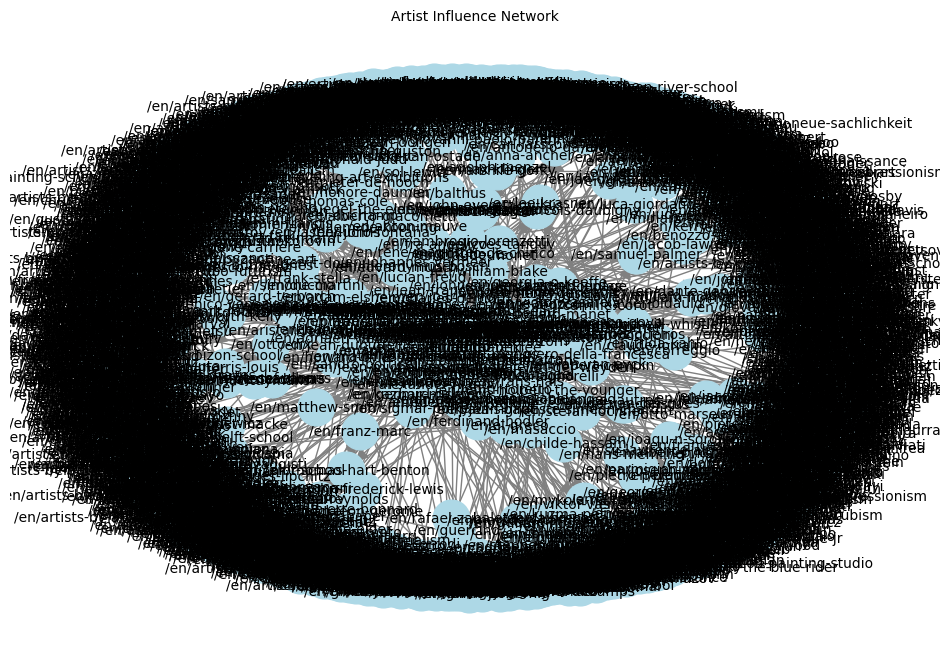

In [ ]:
# Visualization of the network
plt.figure(figsize=(12, 8))

pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

# Draw edges
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray', width=1)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color='Black')

# Draw the title
plt.title("Artist Influence Network", fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
top_10_artists = artist_df.head(10)

In [ ]:
print("Top 10 influential artists based on influenced_on relationships:")
print(top_10_artists.to_string(index=False))

Top 10 influential artists based on influenced_on relationships:
             Artist  Influenced Count
  /en/pablo-picasso                24
   /en/paul-cezanne                22
      /en/rembrandt                21
     /en/caravaggio                21
         /en/titian                17
/en/gustave-courbet                17
/en/nicolas-poussin                16
/en/diego-velazquez                16
        /en/raphael                15
  /en/henri-matisse                15


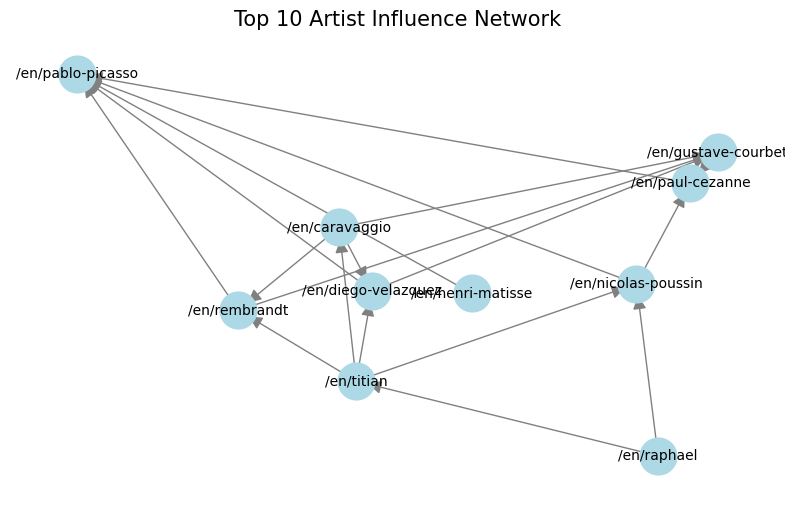

In [ ]:
# Graph Creation
plt.figure(figsize=(10, 6))

# Create a subgraph for the top 10 artists
top_10_nodes = top_10_artists['Artist'].tolist()
top_10_edges = [(u, v) for u, v in edges if u in top_10_nodes and v in top_10_nodes]

# Create a new graph for the top 10 artists
G_top_10 = nx.DiGraph()
G_top_10.add_nodes_from(top_10_nodes)
G_top_10.add_edges_from(top_10_edges)

# Generate a layout for the nodes
pos = nx.spring_layout(G_top_10, seed=42)  # Fixed seed for reproducibility

# Draw nodes
nx.draw_networkx_nodes(G_top_10, pos, node_size=700, node_color='lightblue')

# Draw edges
nx.draw_networkx_edges(G_top_10, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray', width=1)

# Draw labels
nx.draw_networkx_labels(G_top_10, pos, font_size=10, font_color='black')

# Draw the title
plt.title("Top 10 Artist Influence Network", fontsize=15)
plt.axis('off')  # Turn off the axis
plt.show()  # Show the plot

In [ ]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [ ]:
print(G.nodes['/en/ancient-egyptian-painting'])

{'degree': 3}


In [ ]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [ ]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('/en/pablo-picasso', 38)
('/en/paul-cezanne', 29)
('/en/gustave-courbet', 25)
('/en/rembrandt', 25)
('/en/caravaggio', 23)
('/en/titian', 21)
('/en/paul-gauguin', 21)
('/en/vincent-van-gogh', 21)
('/en/raphael', 20)
('/en/henri-matisse', 20)
('/en/jackson-pollock', 20)
('/en/nicolas-poussin', 20)
('/en/eugene-delacroix', 19)
('/en/francis-bacon', 19)
('/en/pierre-auguste-renoir', 18)
('/en/diego-velazquez', 18)
('/en/wassily-kandinsky', 17)
('/en/michelangelo', 17)
('/en/peter-paul-rubens', 17)
('/en/robert-delaunay', 16)


In [ ]:
#Run betweeness and eigen_vector centrality
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [ ]:
#sort betweenness (or eigenvector) centrality
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('/en/paul-cezanne', 0.00042632519530299233)
('/en/pablo-picasso', 0.00040958527374848066)
('/en/eugene-delacroix', 0.0003015323994471709)
('/en/raphael', 0.00028667608851323795)
('/en/titian', 0.00022758394425012382)
('/en/paul-gauguin', 0.00022426192943567335)
('/en/gustave-courbet', 0.00021695880454192397)
('/en/vincent-van-gogh', 0.00020617370349728783)
('/en/albrecht-durer', 0.00019450229847405864)
('/en/pierre-auguste-renoir', 0.00019260674965944913)
('/en/rembrandt', 0.00019065437292304182)
('/en/henri-matisse', 0.00018864823045467187)
('/en/jackson-pollock', 0.00018402934413454754)
('/en/edvard-munch', 0.00016316424192253066)
('/en/francis-bacon', 0.00014911588168598565)
('/en/peter-paul-rubens', 0.00014842978612464617)
('/en/nicolas-poussin', 0.00014744883212920853)
('/en/robert-delaunay', 0.00014724092402269457)
('/en/el-greco', 0.00014250779398353438)
('/en/marc-chagall', 0.00013180825509597564)


In [ ]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: /en/paul-cezanne | Betweenness Centrality: 0.00042632519530299233 | Degree: 29
Name: /en/pablo-picasso | Betweenness Centrality: 0.00040958527374848066 | Degree: 38
Name: /en/eugene-delacroix | Betweenness Centrality: 0.0003015323994471709 | Degree: 19
Name: /en/raphael | Betweenness Centrality: 0.00028667608851323795 | Degree: 20
Name: /en/titian | Betweenness Centrality: 0.00022758394425012382 | Degree: 21
Name: /en/paul-gauguin | Betweenness Centrality: 0.00022426192943567335 | Degree: 21
Name: /en/gustave-courbet | Betweenness Centrality: 0.00021695880454192397 | Degree: 25
Name: /en/vincent-van-gogh | Betweenness Centrality: 0.00020617370349728783 | Degree: 21
Name: /en/albrecht-durer | Betweenness Centrality: 0.00019450229847405864 | Degree: 14
Name: /en/pierre-auguste-renoir | Betweenness Centrality: 0.00019260674965944913 | Degree: 18
Name: /en/rembrandt | Betweenness Centrality: 0.00019065437292304182 | Degree: 25
Name: /en/henri-matisse | Betweenness Centrality: 0.00018

# **Influential Movements**

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph()

# Add movements as nodes and create edges between related movements
movement_count = {}
for _, row in edgereader.iterrows():
    if pd.notna(row['movements']):
        movements = row['movements'].split(',')
        movements = [movement.strip() for movement in movements]

        # Add movements as nodes
        for movement in movements:
            if movement not in G:
                G.add_node(movement, type='movement')
            # Count artists associated with each movement
            movement_count[movement] = movement_count.get(movement, 0) + 1

        # Create edges between movements if an artist is associated
        if len(movements) > 1:
            for i in range(len(movements)):
                for j in range(i + 1, len(movements)):
                    G.add_edge(movements[i], movements[j])

# Convert movement counts to a DataFrame
movement_df = pd.DataFrame(movement_count.items(), columns=['Movement', 'Artist Count'])
movement_df = movement_df.sort_values(by='Artist Count', ascending=False)

# Print the top movements by artist count
print("Most influential movements based on artist associations:")
print(movement_df.to_string(index=False))




Most influential movements based on artist associations:
                                 Movement  Artist Count
                              Romanticism           254
                            Impressionism           209
                            Expressionism           201
                                  Realism           192
                   Abstract Expressionism           153
                               Surrealism           152
                                  Baroque           145
                             Abstract Art           143
                       Post-Impressionism           130
                             Contemporary           109
                              Art Nouveau            94
                                  Pop Art            91
                               Minimalism            87
                             Academic Art            86
                                Symbolism            83
                             Art Informel      

Most influential movements based on artist associations:
                                 Movement  Artist Count
                              Romanticism           254
                            Impressionism           209
                            Expressionism           201
                                  Realism           192
                   Abstract Expressionism           153
                               Surrealism           152
                                  Baroque           145
                             Abstract Art           143
                       Post-Impressionism           130
                             Contemporary           109
                              Art Nouveau            94
                                  Pop Art            91
                               Minimalism            87
                             Academic Art            86
                                Symbolism            83
                             Art Informel      

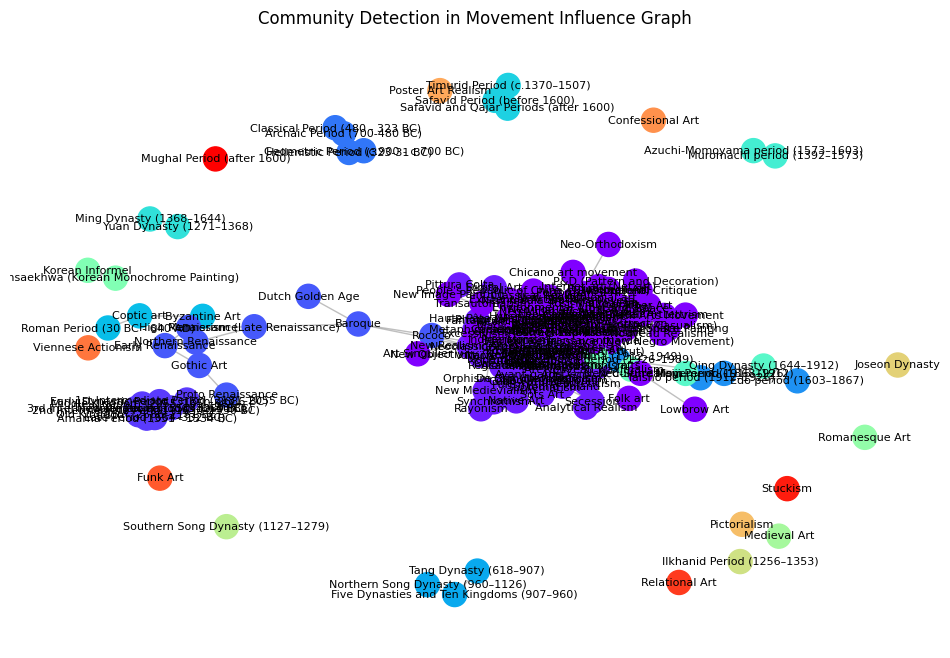

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create the directed graph
G = nx.DiGraph()

# Add movements as nodes and create edges between related movements
movement_count = {}
for _, row in edgereader.iterrows():
    if pd.notna(row['movements']):
        movements = row['movements'].split(',')
        movements = [movement.strip() for movement in movements]

        # Add movements as nodes
        for movement in movements:
            if movement not in G:
                G.add_node(movement, type='movement')
            # Count artists associated with each movement
            movement_count[movement] = movement_count.get(movement, 0) + 1

        # Create edges between movements if an artist is associated
        if len(movements) > 1:
            for i in range(len(movements)):
                for j in range(i + 1, len(movements)):
                    G.add_edge(movements[i], movements[j])

# Convert movement counts to a DataFrame
movement_df = pd.DataFrame(movement_count.items(), columns=['Movement', 'Artist Count'])
movement_df = movement_df.sort_values(by='Artist Count', ascending=False)

# Print the top movements by artist count
print("Most influential movements based on artist associations:")
print(movement_df.to_string(index=False))

# Community Detection
# Convert to undirected graph for community detection
G_undirected = G.to_undirected()
communities = list(nx.algorithms.community.greedy_modularity_communities(G_undirected))

# Count the number of communities detected
num_communities = len(communities)
print(f"\nNumber of detected communities: {num_communities}")

# Identify the biggest community
biggest_community = max(communities, key=len)  # Community with the most members
biggest_community_size = len(biggest_community)

print(f"Biggest community (size {biggest_community_size}): {list(biggest_community)}")

# Visualization of communities
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_undirected, k=0.15)  # Layout for better spacing
color_map = []

for node in G_undirected.nodes():
    for i, community in enumerate(communities):
        if node in community:
            color_map.append(i)  # Assign color based on community index
            break

# Draw nodes
nx.draw_networkx_nodes(G_undirected, pos, node_color=color_map, cmap=plt.cm.rainbow, node_size=300)
nx.draw_networkx_edges(G_undirected, pos, edge_color='gray', alpha=0.5)

# Draw labels for movements
nx.draw_networkx_labels(G_undirected, pos, font_size=8)

# Set plot title and remove axes
plt.title("Community Detection in Movement Influence Graph")
plt.axis('off')
plt.show()


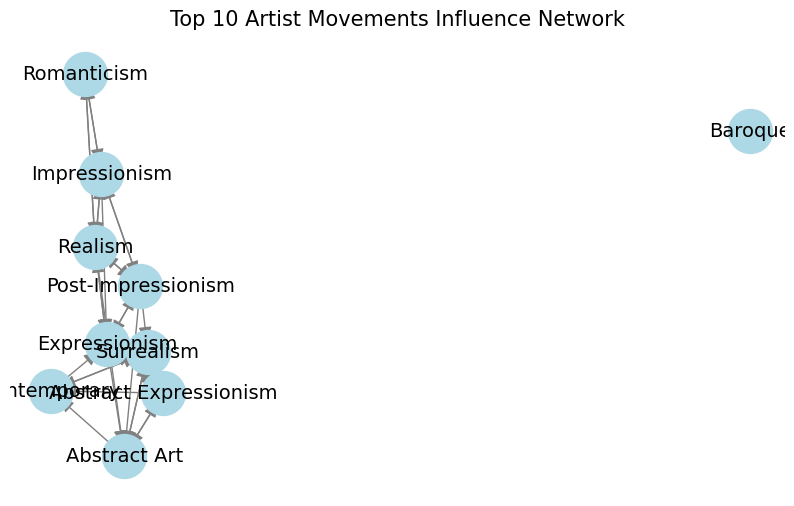

In [ ]:
# Visualize the top 10 movements in a subgraph
top_10_movements = movement_df.head(10)
top_10_nodes = top_10_movements['Movement'].tolist()
top_10_edges = [(u, v) for u, v in G.edges() if u in top_10_nodes and v in top_10_nodes]

# Create a new graph for the top 10 movements
G_top_10 = nx.DiGraph()
G_top_10.add_nodes_from(top_10_nodes)
G_top_10.add_edges_from(top_10_edges)

# Generate a layout for the nodes
pos = nx.spring_layout(G_top_10, seed=42, k=0.3)  # Fixed seed for reproducibility

# Plot the graph
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(G_top_10, pos, node_size=1000, node_color='lightblue')
nx.draw_networkx_edges(G_top_10, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray', width=1)
nx.draw_networkx_labels(G_top_10, pos, font_size=14, font_color='black')

# Draw the title
plt.title("Top 10 Artist Movements Influence Network", fontsize=15)
plt.axis('off')  # Turn off the axis
plt.show()  # Show the plot

In [ ]:
top_10_movements = movement_df.head(10)

In [ ]:
print("Top 10 movements and artists relationships:")
print(top_10_movements.to_string(index=False))

Top 10 movements and artists relationships:
              Movement  Artist Count
           Romanticism           254
         Impressionism           209
         Expressionism           201
               Realism           192
Abstract Expressionism           153
            Surrealism           152
               Baroque           145
          Abstract Art           143
    Post-Impressionism           130
          Contemporary           109


In [ ]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')


In [ ]:
print("Nodes in G:", list(G.nodes)[:10])

Nodes in G: ['Classical Period (480 - 323 BC)', 'Hellenistic Period (323-31 BC)', 'Tang Dynasty (618–907)', 'Early Dynastic Period (3150 – 2686 BC)', 'Old Kingdom (2686–2181 BC)', '1st Intermediate Period (2181–2055 BC)', 'Middle Kingdom (2055–1650 BC)', '2nd Intermediate Period (1650–1550 BC)', 'New Kingdom (1550–1069 BC)', 'Amarna Period (1351 - 1334 BC)']


In [ ]:
print(G.nodes['Romanticism'])

{'type': 'movement'}


In [ ]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [ ]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('/en/pablo-picasso', 38)
('/en/paul-cezanne', 29)
('/en/gustave-courbet', 25)
('/en/rembrandt', 25)
('/en/caravaggio', 23)
('/en/titian', 21)
('/en/paul-gauguin', 21)
('/en/vincent-van-gogh', 21)
('/en/raphael', 20)
('/en/henri-matisse', 20)
('/en/jackson-pollock', 20)
('/en/nicolas-poussin', 20)
('/en/eugene-delacroix', 19)
('/en/francis-bacon', 19)
('/en/pierre-auguste-renoir', 18)
('/en/diego-velazquez', 18)
('/en/wassily-kandinsky', 17)
('/en/michelangelo', 17)
('/en/peter-paul-rubens', 17)
('/en/robert-delaunay', 16)


In [ ]:
#Run betweeness and eigen_vector centrality
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [ ]:
#sort betweenness (or eigenvector) centrality
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('Abstract Art', 0.07822955685255249)
('Contemporary', 0.07363914747585813)
('Expressionism', 0.06654924383058304)
('Baroque', 0.05038961038961039)
('Surrealism', 0.04710257918175805)
('Abstract Expressionism', 0.03834311985851992)
('Romanticism', 0.0380926098182664)
('Social Realism', 0.036717093743376325)
('Mannerism (Late Renaissance)', 0.03641233766233766)
('Neoclassicism', 0.033291318161939296)
('Rococo', 0.0328532500719586)
('Symbolism', 0.03122056837486081)
('Academic Art', 0.028588629241808945)
('Modernism', 0.027159125540363226)
('Neo-Expressionism', 0.0252345617994287)
('Impressionism', 0.02168894475871005)
('Feminist Art', 0.021278656113608553)
('Socialist Realism', 0.020938521684382042)
('Art Nouveau', 0.019783602869720023)
('Conceptual Art', 0.01957384380126747)


In [ ]:

# Calculate eigenvector centrality
eigenvector_dict = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

# Filter eigenvector centrality for movement nodes
movement_eigenvector = {node: ev for node, ev in eigenvector_dict.items() if G.nodes[node].get('type') == 'movement'}

# Sort eigenvector centrality for movement nodes
sorted_eigenvector_movement = sorted(movement_eigenvector.items(), key=itemgetter(1), reverse=True)

# Step 13: Print the top 20 movement by eigenvector centrality
print("Top 20 movement by eigenvector centrality:")
for ev in sorted_eigenvector_movement[:20]:
    print(ev)


Top 20 movement by eigenvector centrality:
('Abstract Art', 0.2741908037510573)
('Expressionism', 0.24014882679992128)
('Contemporary', 0.23117697147889563)
('Pop Art', 0.21172018936535295)
('Contemporary Realism', 0.2061571571704497)
('Socialist Realism', 0.20348102643293645)
('Neo-Expressionism', 0.20272979376188474)
('Surrealism', 0.18726015432897458)
('Avant-garde', 0.18450173367364878)
('Modernism', 0.18405411207909445)
('Magic Realism', 0.17970935717203199)
('Conceptual Art', 0.17689681299891535)
('Kitsch', 0.16813822883504004)
('Social Realism', 0.16725976751378083)
('Soviet Nonconformist Art', 0.16293842419125076)
('Abstract Expressionism', 0.15303066098535317)
('Hyper-Realism)', 0.1331210366428242)
('Minimalism', 0.12684137976386362)
('Art Informel', 0.12204494003731527)
('Photorealism (Super-Realism', 0.12120179048540379)


Number of nodes: 178
Number of edges: 799
Most influential movements based on artist associations:
                                 Movement  Artist Count
                              Romanticism           254
                            Impressionism           209
                            Expressionism           201
                                  Realism           192
                   Abstract Expressionism           153
                               Surrealism           152
                                  Baroque           145
                             Abstract Art           143
                       Post-Impressionism           130
                             Contemporary           109
                              Art Nouveau            94
                                  Pop Art            91
                               Minimalism            87
                             Academic Art            86
                                Symbolism            83
     

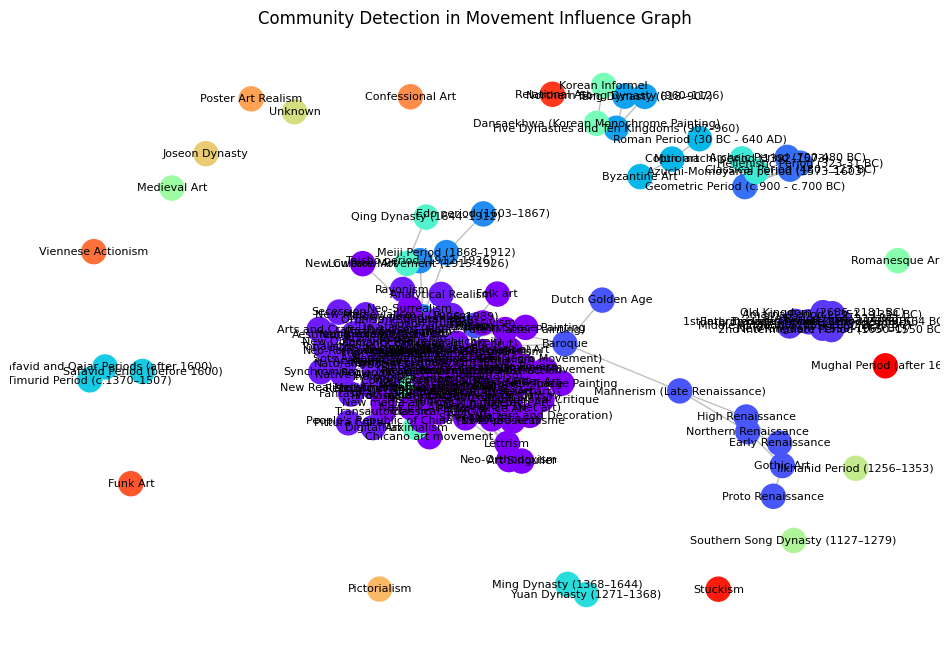

In [102]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create the directed graph
G = nx.DiGraph()

# Add movements as nodes and create edges between related movements
movement_count = {}
for _, row in edgereader.iterrows():
    if pd.notna(row['movements']):
        movements = row['movements'].split(',')
        movements = [movement.strip() for movement in movements]

        # Add movements as nodes
        for movement in movements:
            if movement not in G:
                G.add_node(movement, type='movement')
            # Count artists associated with each movement
            movement_count[movement] = movement_count.get(movement, 0) + 1

        # Create edges between movements if an artist is associated with multiple movements
        if len(movements) > 1:
            for i in range(len(movements)):
                for j in range(i + 1, len(movements)):
                    G.add_edge(movements[i], movements[j])

# Convert movement counts to a DataFrame
movement_df = pd.DataFrame(movement_count.items(), columns=['Movement', 'Artist Count'])
movement_df = movement_df.sort_values(by='Artist Count', ascending=False)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

# Print the top movements by artist count
print("Most influential movements based on artist associations:")
print(movement_df.to_string(index=False))

# Community Detection
# Convert to undirected graph for community detection
G_undirected = G.to_undirected()
communities = list(nx.algorithms.community.greedy_modularity_communities(G_undirected))

# Count the number of communities detected
num_communities = len(communities)
print(f"\nNumber of detected communities: {num_communities}\n")

# Print details about each community
for i, community in enumerate(communities):
    print(f"Community {i + 1}:")
    for movement in community:
        artist_count = movement_count.get(movement, 0)
        print(f"  Movement: {movement} - Associated Artists: {artist_count}")
    print("\n")

# Optional: Visualization of communities
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_undirected, k=0.15)  # Layout for better spacing
color_map = []

for node in G_undirected.nodes():
    for i, community in enumerate(communities):
        if node in community:
            color_map.append(i)  # Assign color based on community index
            break

# Draw nodes
nx.draw_networkx_nodes(G_undirected, pos, node_color=color_map, cmap=plt.cm.rainbow, node_size=300)
nx.draw_networkx_edges(G_undirected, pos, edge_color='gray', alpha=0.5)

# Draw labels for movements
nx.draw_networkx_labels(G_undirected, pos, font_size=8)

# Set plot title and remove axes
plt.title("Community Detection in Movement Influence Graph")
plt.axis('off')
plt.show()


Most influential movements based on artist associations:
                                 Movement  Artist Count
                              Romanticism           254
                            Impressionism           209
                            Expressionism           201
                                  Realism           192
                   Abstract Expressionism           153
                               Surrealism           152
                                  Baroque           145
                             Abstract Art           143
                       Post-Impressionism           130
                             Contemporary           109
                              Art Nouveau            94
                                  Pop Art            91
                               Minimalism            87
                             Academic Art            86
                                Symbolism            83
                             Art Informel      

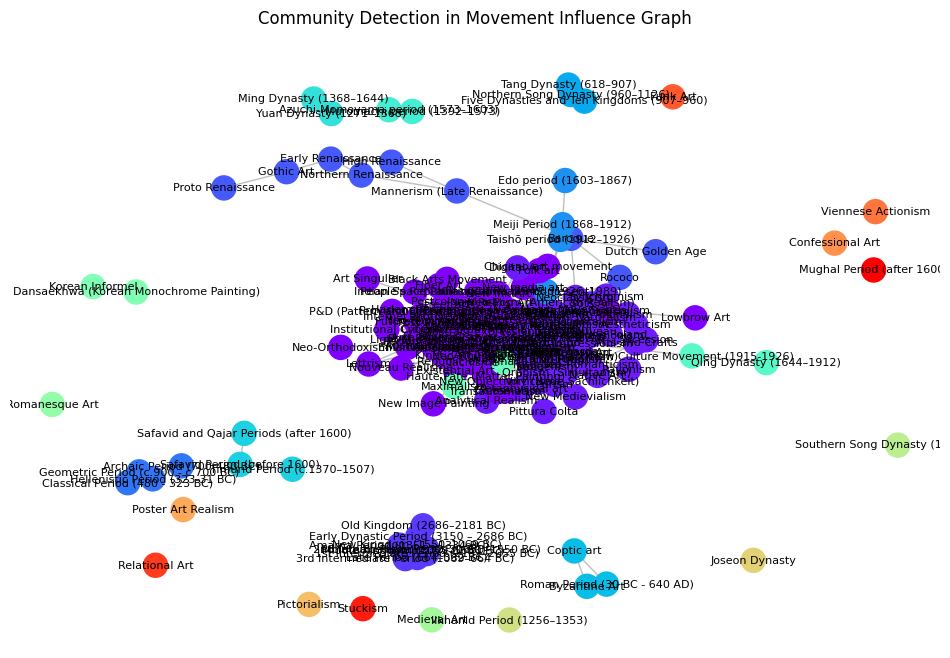

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create the directed graph
G = nx.DiGraph()

# Add movements as nodes and create edges between related movements
movement_count = {}
for _, row in edgereader.iterrows():
    if pd.notna(row['movements']):
        movements = row['movements'].split(',')
        movements = [movement.strip() for movement in movements]

        # Add movements as nodes
        for movement in movements:
            if movement not in G:
                G.add_node(movement, type='movement')
            # Count artists associated with each movement
            movement_count[movement] = movement_count.get(movement, 0) + 1

        # Create edges between movements if an artist is associated with multiple movements
        if len(movements) > 1:
            for i in range(len(movements)):
                for j in range(i + 1, len(movements)):
                    G.add_edge(movements[i], movements[j])

# Convert movement counts to a DataFrame
movement_df = pd.DataFrame(movement_count.items(), columns=['Movement', 'Artist Count'])
movement_df = movement_df.sort_values(by='Artist Count', ascending=False)

# Print the top movements by artist count
print("Most influential movements based on artist associations:")
print(movement_df.to_string(index=False))

# Community Detection
# Convert to undirected graph for community detection
G_undirected = G.to_undirected()
communities = list(nx.algorithms.community.greedy_modularity_communities(G_undirected))

# Count the number of communities detected
num_communities = len(communities)
print(f"\nNumber of detected communities: {num_communities}\n")

# Print details about each community
for i, community in enumerate(communities):
    print(f"Community {i + 1}:")
    for movement in community:
        artist_count = movement_count.get(movement, 0)
        print(f"  Movement: {movement} - Associated Artists: {artist_count}")
    print("\n")

# Identify the largest community
largest_community = max(communities, key=len)
largest_community_size = len(largest_community)
print(f"Largest Community (size {largest_community_size}):")
for movement in largest_community:
    artist_count = movement_count.get(movement, 0)
    print(f"  Movement: {movement} - Associated Artists: {artist_count}")
print("\n")

# Optional: Visualization of communities
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_undirected, k=0.15)  # Layout for better spacing
color_map = []

for node in G_undirected.nodes():
    for i, community in enumerate(communities):
        if node in community:
            color_map.append(i)  # Assign color based on community index
            break

# Draw nodes
nx.draw_networkx_nodes(G_undirected, pos, node_color=color_map, cmap=plt.cm.rainbow, node_size=300)
nx.draw_networkx_edges(G_undirected, pos, edge_color='gray', alpha=0.5)

# Draw labels for movements
nx.draw_networkx_labels(G_undirected, pos, font_size=8)

# Set plot title and remove axes
plt.title("Community Detection in Movement Influence Graph")
plt.axis('off')
plt.show()


Most influential movements based on artist associations:
                                 Movement  Artist Count
                              Romanticism           254
                            Impressionism           209
                            Expressionism           201
                                  Realism           192
                   Abstract Expressionism           153
                               Surrealism           152
                                  Baroque           145
                             Abstract Art           143
                       Post-Impressionism           130
                             Contemporary           109
                              Art Nouveau            94
                                  Pop Art            91
                               Minimalism            87
                             Academic Art            86
                                Symbolism            83
                             Art Informel      

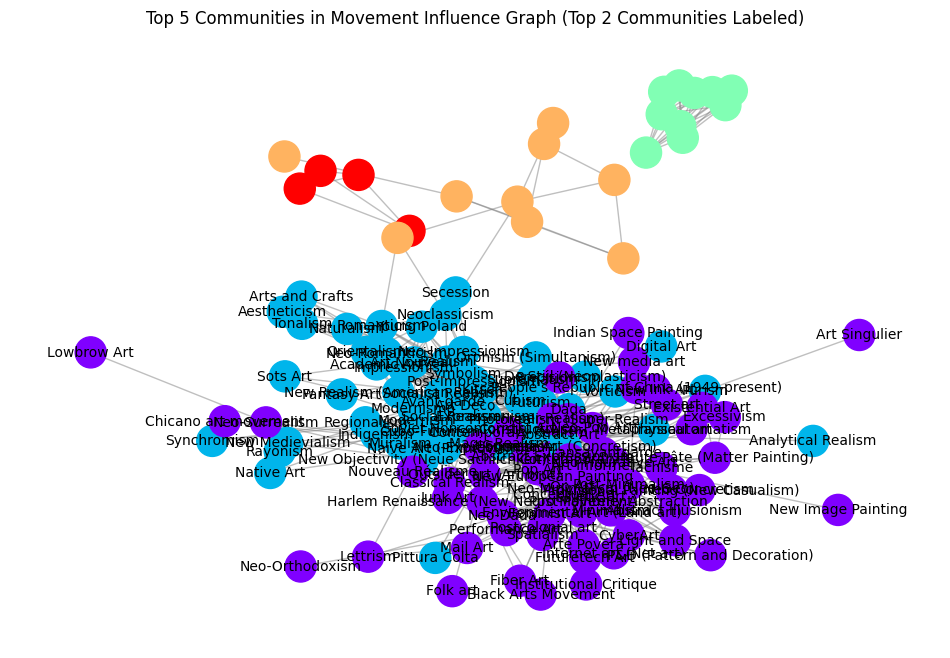

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create the directed graph
G = nx.DiGraph()

# Add movements as nodes and create edges between related movements
movement_count = {}
for _, row in edgereader.iterrows():
    if pd.notna(row['movements']):
        movements = row['movements'].split(',')
        movements = [movement.strip() for movement in movements]

        # Add movements as nodes
        for movement in movements:
            if movement not in G:
                G.add_node(movement, type='movement')
            # Count artists associated with each movement
            movement_count[movement] = movement_count.get(movement, 0) + 1

        # Create edges between movements if an artist is associated with multiple movements
        if len(movements) > 1:
            for i in range(len(movements)):
                for j in range(i + 1, len(movements)):
                    G.add_edge(movements[i], movements[j])

# Convert movement counts to a DataFrame
movement_df = pd.DataFrame(movement_count.items(), columns=['Movement', 'Artist Count'])
movement_df = movement_df.sort_values(by='Artist Count', ascending=False)

# Print the top movements by artist count
print("Most influential movements based on artist associations:")
print(movement_df.to_string(index=False))

# Community Detection
# Convert to undirected graph for community detection
G_undirected = G.to_undirected()
communities = list(nx.algorithms.community.greedy_modularity_communities(G_undirected))

# Sort communities by size and select the top 5 largest communities
sorted_communities = sorted(communities, key=len, reverse=True)[:5]

# Identify the top 2 largest communities for labeling
top_2_communities = sorted_communities[:2]

# Print details about each of the top 5 communities
for i, community in enumerate(sorted_communities):
    print(f"Community {i + 1}:")
    for movement in community:
        artist_count = movement_count.get(movement, 0)
        print(f"  Movement: {movement} - Associated Artists: {artist_count}")
    print("\n")

# Create a subgraph containing only the top 5 communities
top_5_nodes = set(node for community in sorted_communities for node in community)
G_top_5 = G_undirected.subgraph(top_5_nodes)

# Visualization of the top 5 communities
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_top_5, k=0.3)  # Adjust k for spacing between nodes
color_map = []

# Assign colors to nodes based on their community
for node in G_top_5.nodes():
    for i, community in enumerate(sorted_communities):
        if node in community:
            color_map.append(i)  # Color based on community index
            break

# Draw nodes with the color map
nx.draw_networkx_nodes(G_top_5, pos, node_color=color_map, cmap=plt.cm.rainbow, node_size=500)
nx.draw_networkx_edges(G_top_5, pos, edge_color='gray', alpha=0.5)

# Prepare labels for only the top 2 largest communities
labels = {}
for community in top_2_communities:
    for movement in community:
        labels[movement] = movement  # Add the movement name as the label

# Draw labels only for the top 2 communities
nx.draw_networkx_labels(G_top_5, pos, labels=labels, font_size=10)

# Set plot title and remove axes
plt.title("Top 5 Communities in Movement Influence Graph (Top 2 Communities Labeled)")
plt.axis('off')
plt.show()


Most influential movements based on artist associations:
                                 Movement  Artist Count
                              Romanticism           254
                            Impressionism           209
                            Expressionism           201
                                  Realism           192
                   Abstract Expressionism           153
                               Surrealism           152
                                  Baroque           145
                             Abstract Art           143
                       Post-Impressionism           130
                             Contemporary           109
                              Art Nouveau            94
                                  Pop Art            91
                               Minimalism            87
                             Academic Art            86
                                Symbolism            83
                             Art Informel      

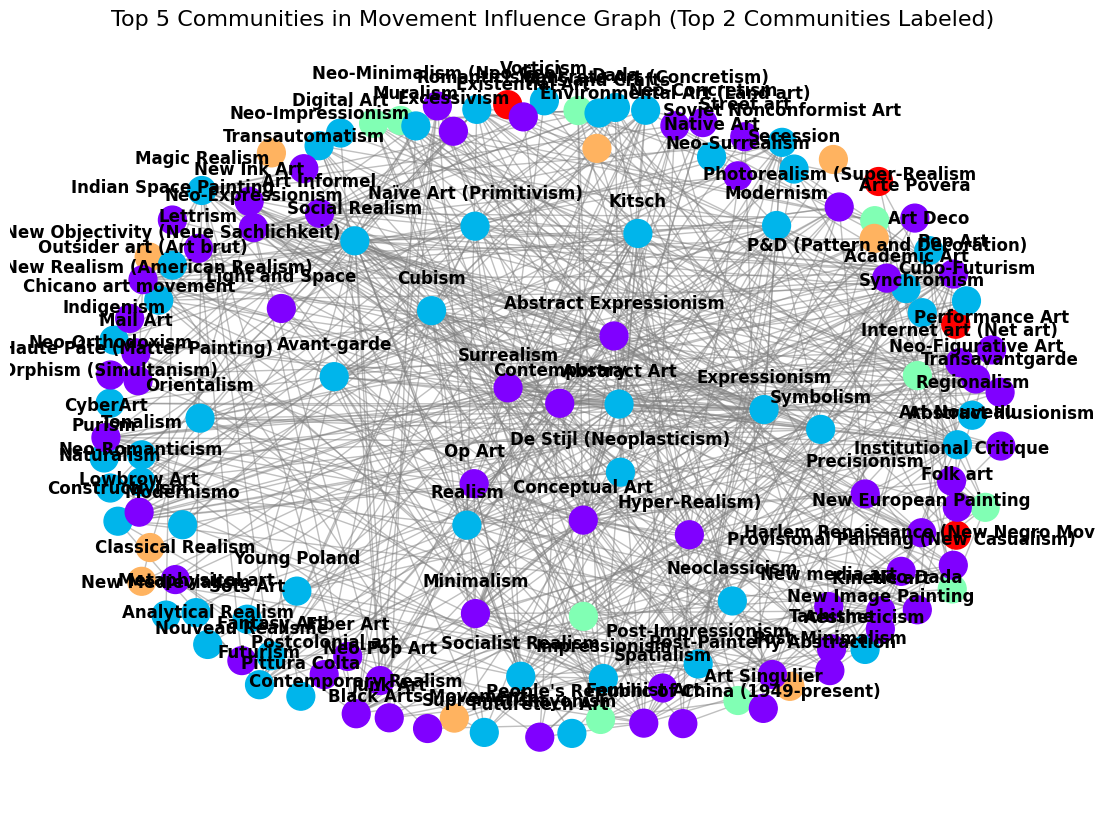

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create the directed graph
G = nx.DiGraph()

# Add movements as nodes and create edges between related movements
movement_count = {}
for _, row in edgereader.iterrows():
    if pd.notna(row['movements']):
        movements = row['movements'].split(',')
        movements = [movement.strip() for movement in movements]

        # Add movements as nodes
        for movement in movements:
            if movement not in G:
                G.add_node(movement, type='movement')
            # Count artists associated with each movement
            movement_count[movement] = movement_count.get(movement, 0) + 1

        # Create edges between movements if an artist is associated with multiple movements
        if len(movements) > 1:
            for i in range(len(movements)):
                for j in range(i + 1, len(movements)):
                    G.add_edge(movements[i], movements[j])

# Convert movement counts to a DataFrame
movement_df = pd.DataFrame(movement_count.items(), columns=['Movement', 'Artist Count'])
movement_df = movement_df.sort_values(by='Artist Count', ascending=False)

# Print the top movements by artist count
print("Most influential movements based on artist associations:")
print(movement_df.to_string(index=False))

# Community Detection
# Convert to undirected graph for community detection
G_undirected = G.to_undirected()
communities = list(nx.algorithms.community.greedy_modularity_communities(G_undirected))

# Sort communities by size and select the top 5 largest communities
sorted_communities = sorted(communities, key=len, reverse=True)[:5]

# Identify the top 2 largest communities for labeling
top_2_communities = sorted_communities[:2]

# Print details about each of the top 5 communities
for i, community in enumerate(sorted_communities):
    print(f"Community {i + 1}:")
    for movement in community:
        artist_count = movement_count.get(movement, 0)
        print(f"  Movement: {movement} - Associated Artists: {artist_count}")
    print("\n")

# Create a subgraph containing only the top 5 communities
top_5_nodes = set(node for community in sorted_communities for node in community)
G_top_5 = G_undirected.subgraph(top_5_nodes)

# Visualization of the top 5 communities
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_top_5, k=2.0)  # Increase k for more spacing
color_map = []

# Assign colors to nodes based on their community
for node in G_top_5.nodes():
    for i, community in enumerate(sorted_communities):
        if node in community:
            color_map.append(i)  # Color based on community index
            break

# Draw nodes with the color map
nx.draw_networkx_nodes(G_top_5, pos, node_color=color_map, cmap=plt.cm.rainbow, node_size=400)
nx.draw_networkx_edges(G_top_5, pos, edge_color='gray', alpha=0.5)

# Prepare labels only for the top 2 largest communities with improved readability
labels = {}
for community in top_2_communities:
    for movement in community:
        labels[movement] = movement  # Label movements in top 2 communities only

# Use offset positioning for labels to avoid overlap
label_positions = {k: (v[0], v[1] + 0.1) for k, v in pos.items()}  # Adjust offset as needed

# Draw labels with increased font size and offset
nx.draw_networkx_labels(G_top_5, label_positions, labels=labels, font_size=12, font_weight='bold')

# Set plot title and remove axes
plt.title("Top 5 Communities in Movement Influence Graph (Top 2 Communities Labeled)", fontsize=16)
plt.axis('off')
plt.show()


## **Influential Institutions NetworkX**

In [ ]:
# Check for missing values
print("\nMissing Values in Artists DataFrame:")
print(nodereader.isnull().sum())

# Drop the 'year' column and fill missing values in the 'nation' column
artists_df_cleaned = nodereader.drop(columns=['year'])  # Drop the year column
artists_df_cleaned['nation'] = artists_df_cleaned['nation'].fillna('Unknown')  # Fill missing nations with 'Unknown'

# Verify that missing values have been handled and the column has been dropped
print("\nCleaned Artists DataFrame:")
print(artists_df_cleaned.head())
print("\nMissing Values in Cleaned Artists DataFrame:")
print(artists_df_cleaned.isnull().sum())


Missing Values in Artists DataFrame:
artistUrl           0
id                  0
image               0
nation             32
title               0
totalWorksTitle     0
year                1
dtype: int64

Cleaned Artists DataFrame:
                       artistUrl                        id  \
0  /en/ancient-egyptian-painting  5d230b31edc2c9fb74ae130a   
1      /en/ancient-greek-pottery  5ced09b1edc2c993247c1ea0   
2     /en/ancient-greek-painting  5ce3c54dedc2c921c4035b7d   
3                    /en/apelles  5ba232ccedc2c918cc654ea8   
4             /en/fayum-portrait  5beea1ededc2c915a01acdda   

                                                                                                                                               image  \
0                        https://uploads2.wikiart.org/00244/images/ancient-egyptian-painting/stela-of-aafenmut-ca-924-889-b-c.jpg!PinterestLarge.jpg   
1                                             https://uploads7.wikiart.org/00238/images/an

In [ ]:
# Check for missing values
print("\nMissing Values in Artists DataFrame:")
print(edgereader.isnull().sum())

columns_to_fill = ['friends', 'influenced_by', 'influenced_on', 'institution', 'movements', 'school']
for column in columns_to_fill:
    edgereader[column].fillna('Unknown',inplace=True)

# Print the DataFrame to verify that missing values have been handled
print("\nUpdated Relationships DataFrame:")
print(edgereader.head())  # Show the first few rows to verify the changes

# Print the number of missing values in each column after handling
print("\nMissing Values in Relationships DataFrame After Handling:")
print(edgereader.isnull().sum())


Missing Values in Artists DataFrame:
artistUrl           0
friends          2580
influenced_by    2512
influenced_on    2637
institution      2362
movements          40
school           1966
type                1
dtype: int64

Updated Relationships DataFrame:
                       artistUrl  friends               influenced_by  \
0                    /en/apelles  Unknown  /en/ancient-greek-painting   
1                   /en/wang-wei  Unknown                     Unknown   
2  /en/ancient-egyptian-painting  Unknown                     Unknown   
3                    /en/guanxiu  Unknown                     Unknown   
4                    /en/han-gan  Unknown                     Unknown   

                                                             influenced_on  \
0                                               /en/ancient-greek-painting   
1                                                                  Unknown   
2  /en/fayum-portrait,/en/ancient-greek-painting,/en/ancient-greek

<ipython-input-71-499ee1ab966c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  edgereader[column].fillna('Unknown',inplace=True)


In [103]:
import pandas as pd
import networkx as nx
pd.set_option('display.max_colwidth', None)

G = nx.DiGraph()

# Add artist nodes from the artists DataFrame
for _, row in artists_df_cleaned.iterrows():
    artist = row['artistUrl']
    G.add_node(artist, type='artist')

# Add institution nodes and edges from the relationships DataFrame
if 'institution' in edgereader.columns:
    for _, row in edgereader.iterrows():
        artist = row['artistUrl']
        if pd.notna(row['institution']):
            institutions = row['institution'].split(',')
            for institution in institutions:
                institution = institution.strip()

                if institution not in G:
                    G.add_node(institution, type='institution')

                # Add edge from artist to institution
                G.add_edge(artist, institution, relationship='attended_institution')

# Analyze the graph to find the most influential institutions
institution_count = {}
for node in G.nodes(data=True):
    if node[1]['type'] == 'institution':
        institution_count[node[0]] = G.in_degree(node[0])

# Convert to DataFrame for easier handling and sorting
institution_df = pd.DataFrame(institution_count.items(), columns=['Institution', 'Artist Count'])

# Exclude 'Unknown' and sort the DataFrame by the number of artists
institution_df = institution_df[institution_df['Institution'] != 'Unknown']
institution_df = institution_df.sort_values(by='Artist Count', ascending=False)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

# Print the results
print("Most influential institutions based on artist associations:")
print(institution_df.to_string(index=False))


Number of nodes: 3085
Number of edges: 3197
Most influential institutions based on artist associations:
                                                                      Institution  Artist Count
                               /en/artists-by-art-institution/cole-des-beaux-arts            81
                                   /en/artists-by-art-institution/acad-mie-julian            53
                               /en/artists-by-art-institution/art-students-league            51
                                      /en/artists-by-art-institution/akademie-der            36
  /en/artists-by-art-institution/imperial-academy-of-arts-saint-petersburg-russia            35
                               /en/artists-by-art-institution/guild-of-saint-luke            31
                                  /en/artists-by-art-institution/royal-academy-of            29
                                  /en/artists-by-art-institution/national-academy            26
  /en/artists-by-art-institution

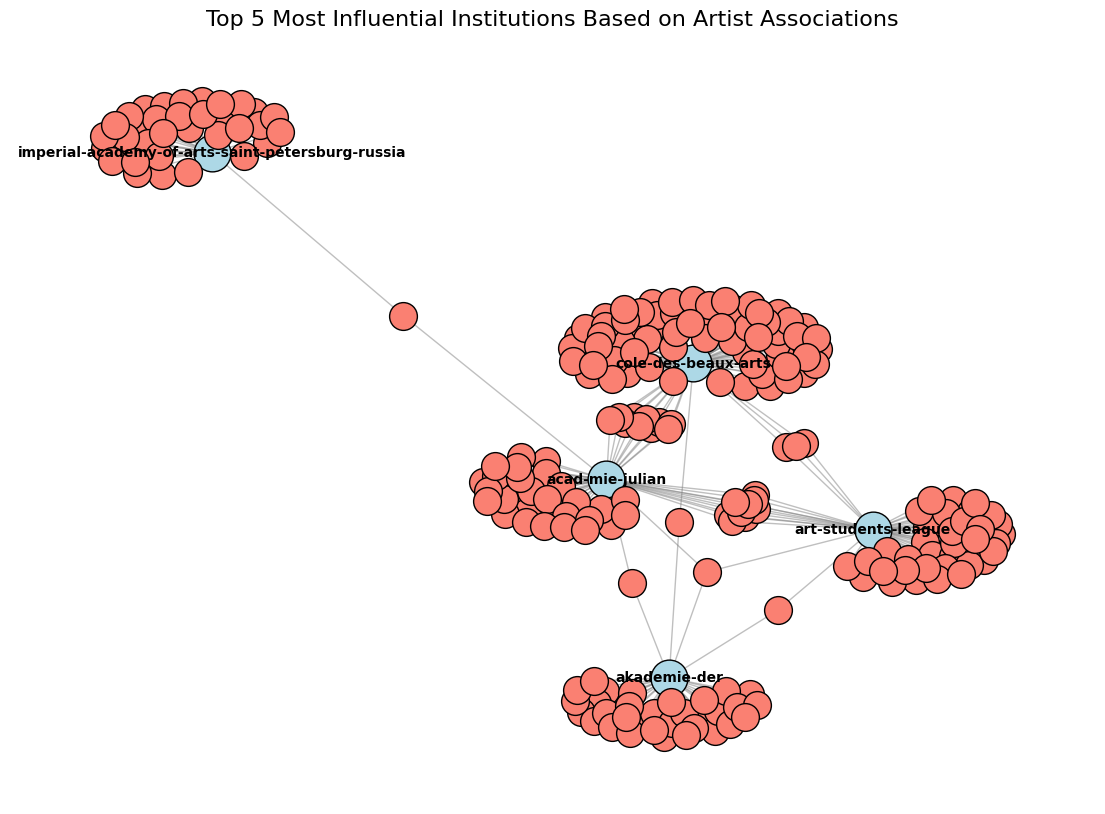

In [124]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Set options for pandas display
pd.set_option('display.max_colwidth', None)

# Initialize a directed graph
G = nx.DiGraph()

# Add artist nodes from the artists DataFrame
for _, row in artists_df_cleaned.iterrows():
    artist = row['artistUrl']
    G.add_node(artist, type='artist')

# Add institution nodes and edges from the relationships DataFrame
if 'institution' in edgereader.columns:
    for _, row in edgereader.iterrows():
        artist = row['artistUrl']
        if pd.notna(row['institution']):
            institutions = row['institution'].split(',')
            for institution in institutions:
                institution = institution.strip()
                # Remove the specific prefix and any slashes
                institution = institution.replace('/en/artists-by-art-institution/', '').replace('/', '').replace('\\', '')

                if institution not in G:
                    G.add_node(institution, type='institution')

                # Add edge from artist to institution
                G.add_edge(artist, institution, relationship='attended_institution')

# Analyze the graph to find the most influential institutions
institution_count = {}
for node in G.nodes(data=True):
    if node[1]['type'] == 'institution':
        institution_count[node[0]] = G.in_degree(node[0])

# Convert to DataFrame for easier handling and sorting
institution_df = pd.DataFrame(institution_count.items(), columns=['Institution', 'Artist Count'])

# Exclude 'Unknown' and sort the DataFrame by the number of artists
institution_df = institution_df[institution_df['Institution'] != 'Unknown']
institution_df = institution_df.sort_values(by='Artist Count', ascending=False)

# Get top 20 institutions
top_institutions = institution_df.head(5)

# Create a new graph for the top institutions and their associated artists
G_top = nx.Graph()

# Add nodes and edges for the top institutions
for _, row in top_institutions.iterrows():
    institution = row['Institution']

    # Add the institution node
    G_top.add_node(institution, type='institution')

    # Add associated artists from the original graph
    for artist in G.predecessors(institution):
        G_top.add_node(artist, type='artist')
        G_top.add_edge(artist, institution, relationship='attended_institution')

# Create a layout for the graph
pos = nx.spring_layout(G_top, seed=42)

# Draw nodes and edges
plt.figure(figsize=(14, 10))

# Draw institution nodes with a distinct color
institution_nodes = [node for node, attr in G_top.nodes(data=True) if attr['type'] == 'institution']
nx.draw_networkx_nodes(G_top, pos, nodelist=institution_nodes, node_color='lightblue', node_size=700, edgecolors='black')

# Draw artist nodes
artist_nodes = [node for node, attr in G_top.nodes(data=True) if attr['type'] == 'artist']
nx.draw_networkx_nodes(G_top, pos, nodelist=artist_nodes, node_color='salmon', node_size=400, edgecolors='black')

# Draw edges
nx.draw_networkx_edges(G_top, pos, edge_color='gray', alpha=0.5)

# Draw labels for the institutions only, cleaning up the labels
labels = {node: node for node in institution_nodes}
nx.draw_networkx_labels(G_top, pos, labels=labels, font_size=10, font_weight='bold')

# Set the title and display the graph
plt.title("Top 5 Most Influential Institutions Based on Artist Associations", fontsize=16)
plt.axis('off')
plt.show()


In [ ]:
top_10_institute = institution_df.head(10)['Institution'].tolist()
print("top_10_institute:")
for institution in top_10_institute:
    print(institution)

top_10_institute:
/en/artists-by-art-institution/cole-des-beaux-arts
/en/artists-by-art-institution/acad-mie-julian
/en/artists-by-art-institution/art-students-league
/en/artists-by-art-institution/akademie-der
/en/artists-by-art-institution/imperial-academy-of-arts-saint-petersburg-russia
/en/artists-by-art-institution/guild-of-saint-luke
/en/artists-by-art-institution/royal-academy-of
/en/artists-by-art-institution/national-academy
/en/artists-by-art-institution/national-academy-of-visual-arts-and-architecture
/en/artists-by-art-institution/kunstakademie-dusseldorf-dusseldorf-germany


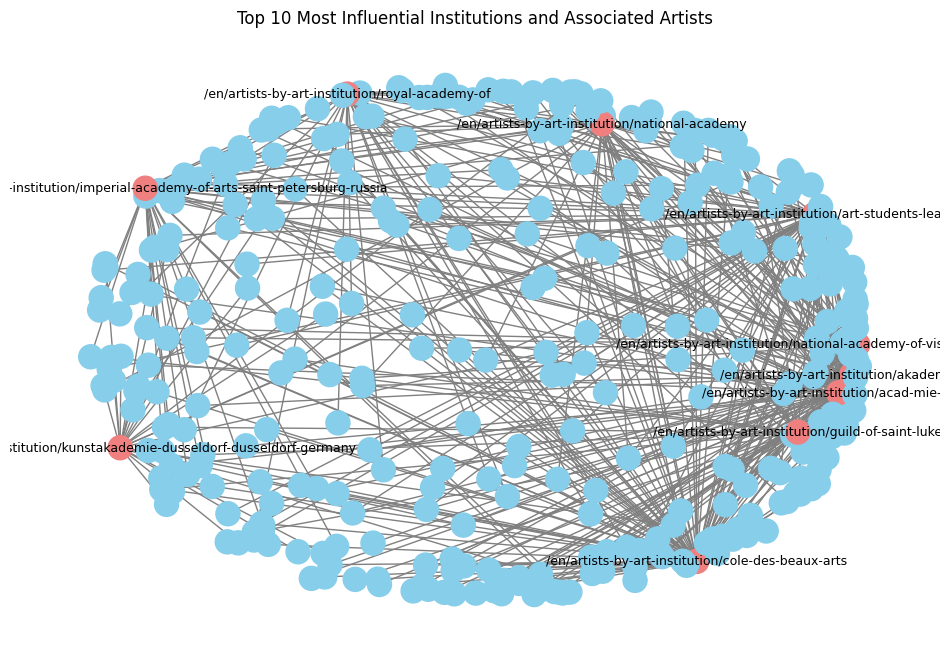

In [ ]:
top_institutions_subgraph = G.subgraph(top_10_institute + [
    artist for artist, inst in G.edges() if inst in top_10_institute
])

# Visualization of the subgraph for top 10 institutions and their artists
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(top_institutions_subgraph, k=0.7)  # Layout for better spacing

# Draw nodes with color-coding for artists and institutions
node_colors = ['skyblue' if G.nodes[node]['type'] == 'artist' else 'lightcoral' for node in top_institutions_subgraph]
nx.draw_networkx_nodes(top_institutions_subgraph, pos, node_color=node_colors, node_size=300)

# Draw labels only for institution nodes for clarity
labels = {node: node for node in top_10_institute}
nx.draw_networkx_labels(top_institutions_subgraph, pos, labels, font_size=9)

# Draw edges representing artist-institution relationships
nx.draw_networkx_edges(top_institutions_subgraph, pos, edge_color='gray', arrows=False)

# Set plot title and remove axes for clarity
plt.title("Top 10 Most Influential Institutions and Associated Artists")
plt.axis('off')
plt.show()


Number of detected communities among institutions: 9
Biggest community among institutions (size 19): ['/en/artists-by-art-institution/school-of-the-art', '/en/artists-by-art-institution/washington-and-lee', '/en/artists-by-art-institution/gerrit-rietveld-academie-amsterdam-netherlands', '/en/artists-by-art-institution/black-mountain', '/en/artists-by-art-institution/american-artists', '/en/artists-by-art-institution/national-gallery-of-victoria-art-school-melbourne', '/en/artists-by-art-institution/cleveland-institute-of-art-cleveland-oh-us', '/en/artists-by-art-institution/bennington-college', '/en/artists-by-art-institution/university-of-california-ucla-los-angeles-ca-us', '/en/artists-by-art-institution/art-students-league', '/en/artists-by-art-institution/accademia-delle-arti', '/en/artists-by-art-institution/accademia-di-belle-arti-di-brera-brera-academy', '/en/artists-by-art-institution/tufts-school-of-the', '/en/artists-by-art-institution/otis-college-of-art-and-design-los-ange

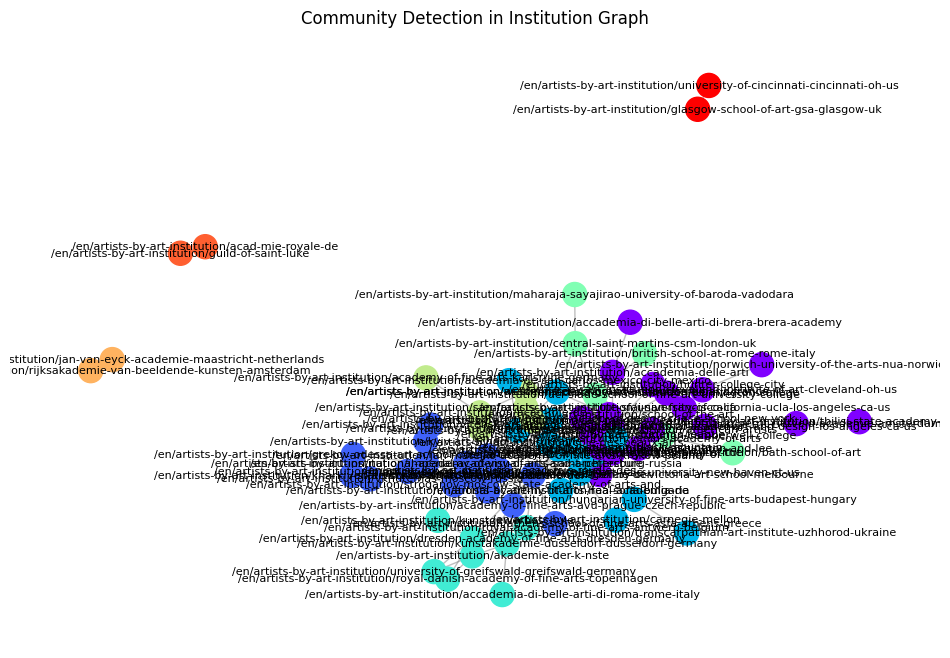

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


pd.set_option('display.max_colwidth', None)

G = nx.DiGraph()

# Add artist nodes from the artists DataFrame
for _, row in artists_df_cleaned.iterrows():
    artist = row['artistUrl']
    G.add_node(artist, type='artist')

# Add institution nodes and edges from the relationships DataFrame
if 'institution' in edgereader.columns:
    for _, row in edgereader.iterrows():
        artist = row['artistUrl']
        if pd.notna(row['institution']):
            institutions = row['institution'].split(',')
            for institution in institutions:
                institution = institution.strip()

                if institution not in G:
                    G.add_node(institution, type='institution')

                # Add edge from artist to institution
                G.add_edge(artist, institution, relationship='attended_institution')

# Create an undirected graph for institutions
G_institution = nx.Graph()

# Add edges between institutions based on shared artists
for artist in G.nodes():
    if G.nodes[artist]['type'] == 'artist':
        institutions = list(G.successors(artist))
        for i in range(len(institutions)):
            for j in range(i + 1, len(institutions)):
                G_institution.add_edge(institutions[i], institutions[j])

# Community Detection
communities = list(nx.algorithms.community.greedy_modularity_communities(G_institution))

# Count the number of communities detected
num_communities = len(communities)
print(f"\nNumber of detected communities among institutions: {num_communities}")

# Identify the biggest community
biggest_community = max(communities, key=len)  # Community with the most members
biggest_community_size = len(biggest_community)

print(f"Biggest community among institutions (size {biggest_community_size}): {list(biggest_community)}")

# Optional: Visualization of institution communities
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_institution, k=0.15)  # Layout for better spacing
color_map = []

for node in G_institution.nodes():
    for i, community in enumerate(communities):
        if node in community:
            color_map.append(i)  # Assign color based on community index
            break
    else:
        color_map.append(-1)  # For nodes not in any community

# Draw nodes
nx.draw_networkx_nodes(G_institution, pos, node_color=color_map, cmap=plt.cm.rainbow, node_size=300)
nx.draw_networkx_edges(G_institution, pos, edge_color='gray', alpha=0.5)

# Draw labels for institutions
institution_labels = {node: node for node in G_institution.nodes()}
nx.draw_networkx_labels(G_institution, pos, labels=institution_labels, font_size=8)

# Set plot title and remove axes
plt.title("Community Detection in Institution Graph")
plt.axis('off')
plt.show()



Number of detected communities among institutions: 9
Biggest community among institutions (size 19): ['/en/artists-by-art-institution/school-of-the-art', '/en/artists-by-art-institution/washington-and-lee', '/en/artists-by-art-institution/gerrit-rietveld-academie-amsterdam-netherlands', '/en/artists-by-art-institution/black-mountain', '/en/artists-by-art-institution/american-artists', '/en/artists-by-art-institution/national-gallery-of-victoria-art-school-melbourne', '/en/artists-by-art-institution/cleveland-institute-of-art-cleveland-oh-us', '/en/artists-by-art-institution/bennington-college', '/en/artists-by-art-institution/university-of-california-ucla-los-angeles-ca-us', '/en/artists-by-art-institution/art-students-league', '/en/artists-by-art-institution/accademia-delle-arti', '/en/artists-by-art-institution/accademia-di-belle-arti-di-brera-brera-academy', '/en/artists-by-art-institution/tufts-school-of-the', '/en/artists-by-art-institution/otis-college-of-art-and-design-los-ange

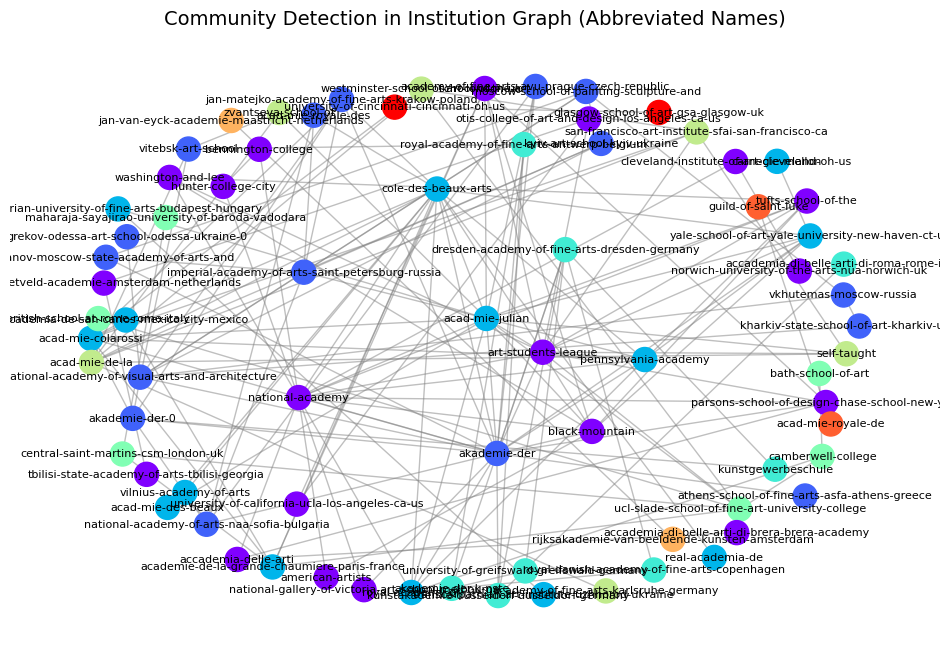

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

G = nx.DiGraph()

# Add artist nodes from the artists DataFrame
for _, row in artists_df_cleaned.iterrows():
    artist = row['artistUrl']
    G.add_node(artist, type='artist')

# Add institution nodes and edges from the relationships DataFrame
if 'institution' in edgereader.columns:
    for _, row in edgereader.iterrows():
        artist = row['artistUrl']
        if pd.notna(row['institution']):
            institutions = row['institution'].split(',')
            for institution in institutions:
                institution = institution.strip()

                if institution not in G:
                    G.add_node(institution, type='institution')

                # Add edge from artist to institution
                G.add_edge(artist, institution, relationship='attended_institution')

# Create an undirected graph for institutions
G_institution = nx.Graph()

# Add edges between institutions based on shared artists
for artist in G.nodes():
    if G.nodes[artist]['type'] == 'artist':
        institutions = list(G.successors(artist))
        for i in range(len(institutions)):
            for j in range(i + 1, len(institutions)):
                G_institution.add_edge(institutions[i], institutions[j])

# Community Detection
communities = list(nx.algorithms.community.greedy_modularity_communities(G_institution))

# Count the number of communities detected
num_communities = len(communities)
print(f"\nNumber of detected communities among institutions: {num_communities}")

# Identify the biggest community
biggest_community = max(communities, key=len)  # Community with the most members
biggest_community_size = len(biggest_community)

print(f"Biggest community among institutions (size {biggest_community_size}): {list(biggest_community)}")

# Optional: Visualization of institution communities
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_institution, k=2.0)  # Layout for better spacing
color_map = []

for node in G_institution.nodes():
    for i, community in enumerate(communities):
        if node in community:
            color_map.append(i)  # Assign color based on community index
            break
    else:
        color_map.append(-1)  # For nodes not in any community

# Draw nodes
nx.draw_networkx_nodes(G_institution, pos, node_color=color_map, cmap=plt.cm.rainbow, node_size=300)
nx.draw_networkx_edges(G_institution, pos, edge_color='gray', alpha=0.5)

# Draw labels for institutions, showing only the name after the last slash
def get_institution_label(name):
    # Split the name by '/' and return the last part
    return name.split('/')[-1] if '/' in name else name

institution_labels = {node: get_institution_label(node) for node in G_institution.nodes()}

nx.draw_networkx_labels(G_institution, pos, labels=institution_labels, font_size=8)

# Set plot title and remove axes
plt.title("Community Detection in Institution Graph (Abbreviated Names)", fontsize=14)
plt.axis('off')
plt.show()

In [ ]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [ ]:
print(G.nodes['/en/artists-by-art-institution/cole-des-beaux-arts'])

{'type': 'institution', 'degree': 81}


In [ ]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [ ]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('Unknown', 2362)
('/en/artists-by-art-institution/cole-des-beaux-arts', 81)
('/en/artists-by-art-institution/acad-mie-julian', 53)
('/en/artists-by-art-institution/art-students-league', 51)
('/en/artists-by-art-institution/akademie-der', 36)
('/en/artists-by-art-institution/imperial-academy-of-arts-saint-petersburg-russia', 35)
('/en/artists-by-art-institution/guild-of-saint-luke', 31)
('/en/artists-by-art-institution/royal-academy-of', 29)
('/en/artists-by-art-institution/national-academy', 26)
('/en/artists-by-art-institution/national-academy-of-visual-arts-and-architecture', 25)
('/en/artists-by-art-institution/kunstakademie-dusseldorf-dusseldorf-germany', 23)
('/en/artists-by-art-institution/self-taught', 20)
('/en/artists-by-art-institution/akademie-der-0', 20)
('/en/artists-by-art-institution/acad-mie-des-beaux', 19)
('/en/artists-by-art-institution/acad-mie-colarossi', 19)
('/en/artists-by-art-institution/ucl-slade-school-of-fine-art-university-college',

In [ ]:
# Calculate eigenvector centrality
eigenvector_dict = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

# Filter eigenvector centrality for institution nodes
nationality_eigenvector = {node: ev for node, ev in eigenvector_dict.items() if G.nodes[node].get('type') == 'institution'}

# Sort eigenvector centrality for institution nodes
sorted_eigenvector_nationality = sorted(nationality_eigenvector.items(), key=itemgetter(1), reverse=True)

# Print the top 20 institution by eigenvector centrality
print("Top 20 nationalities by eigenvector centrality:")
for ev in sorted_eigenvector_nationality[:20]:
    print(ev)


Top 20 nationalities by eigenvector centrality:
('Unknown', 0.9979615979696818)
('/en/artists-by-art-institution/cole-des-beaux-arts', 0.03424161510977803)
('/en/artists-by-art-institution/acad-mie-julian', 0.022411646008475287)
('/en/artists-by-art-institution/art-students-league', 0.02156664821552506)
('/en/artists-by-art-institution/akademie-der', 0.015229164768398373)
('/en/artists-by-art-institution/imperial-academy-of-arts-saint-petersburg-russia', 0.014806665871923261)
('/en/artists-by-art-institution/guild-of-saint-luke', 0.013116670286022819)
('/en/artists-by-art-institution/royal-academy-of', 0.012271672493072594)
('/en/artists-by-art-institution/national-academy', 0.011004175803647261)
('/en/artists-by-art-institution/national-academy-of-visual-arts-and-architecture', 0.010581676907172148)
('/en/artists-by-art-institution/kunstakademie-dusseldorf-dusseldorf-germany', 0.00973667911422192)
('/en/artists-by-art-institution/self-taught', 0.00846918242479658)
('/en/artists-by-art

# **Influential Nationalities**

In [ ]:
import pandas as pd
import networkx as nx

G = nx.DiGraph()

# Step 1: Add nationality nodes and artist-nationality edges
for _, row in artists_df_cleaned.iterrows():
    artist = row['artistUrl']
    nationality = row['nation']

    # Add artist node
    G.add_node(artist, type='artist')

    # Add nationality node if it doesn't exist
    if nationality not in G and nationality != 'Unknown':  # Exclude 'Unknown'
        G.add_node(nationality, type='nationality')

    # Add edge from artist to nationality if not 'Unknown'
    if nationality != 'Unknown':
        G.add_edge(artist, nationality, relationship='from_nationality')

# Step 2: Add edges from `relationships_df` based on institution and school relationships
for _, row in edgereader.iterrows():
    artist = row['artistUrl']

# Step 3: Count the number of artists per nationality, excluding 'Unknown'
nationality_count = {}
for artist, attr in G.nodes(data=True):
    if attr.get('type') == 'artist':
        # Find the nationality this artist connects to
        for neighbor in G.neighbors(artist):
            if G.nodes[neighbor].get('type') == 'nationality' and neighbor != 'Unknown':
                nationality = neighbor
                nationality_count[nationality] = nationality_count.get(nationality, 0) + 1

# Step 4: Convert to DataFrame for easier handling and sorting
nationality_df = pd.DataFrame(nationality_count.items(), columns=['Nationality', 'Artist Count'])

# Step 5: Sort the DataFrame by the number of artists
nationality_df = nationality_df.sort_values(by='Artist Count', ascending=False)

# Print the results
print("Nationalities with the majority of artists (excluding Unknown):")
print(nationality_df)


Nationalities with the majority of artists (excluding Unknown):
      Nationality  Artist Count
28       American           520
13         French           402
4         Italian           269
18        British           249
11         German           160
..            ...           ...
76       Italians             1
75   Bangladeshis             1
73      Romanians             1
67        Bosnian             1
105   Cameroonian             1

[106 rows x 2 columns]


In [ ]:
top_nationalities = nationality_df.head(10)['Nationality'].tolist()
print("top_10_institute:")
for nationality in top_nationalities:
    print(nationality)

top_10_institute:
American
French
Italian
British
German
Russian
Dutch
Spanish
Romanian
Japanese



Community 1:
  Nationality: American
  Artists: /en/john-frederick-kensett, /en/james-hamilton, /en/martin-johnson-heade, /en/jasper-francis-cropsey, /en/william-hart, /en/william-bradford, /en/william-holbrook-beard, /en/eastman-johnson, /en/george-inness, /en/richard-caton-woodville-sr, /en/frederic-edwin-church, /en/david-johnson, /en/edward-mitchell-bannister, /en/alonzo-chappel, /en/albert-bierstadt, /en/james-mcneill-whistler, /en/alexander-helwig-wyant, /en/winslow-homer, /en/henry-arthur-mcardle, /en/mary-josephine-walters, /en/thomas-moran, /en/daniel-ridgway-knight, /en/mary-cassatt, /en/thomas-eakins, /en/cassius-marcellus-coolidge, /en/albert-pinkham-ryder, /en/t-c-steele, /en/ralph-blakelock, /en/francis-davis-millet, /en/lilla-cabot-perry, /en/william-henry-huddle, /en/louis-comfort-tiffany, /en/william-michael-harnett, /en/william-williams, /en/john-singleton-copley, /en/benjamin-west, /en/charles-willson-peale, /en/ralph-earl, /en/gilbert-stuart, /en/john-trumbull, /en

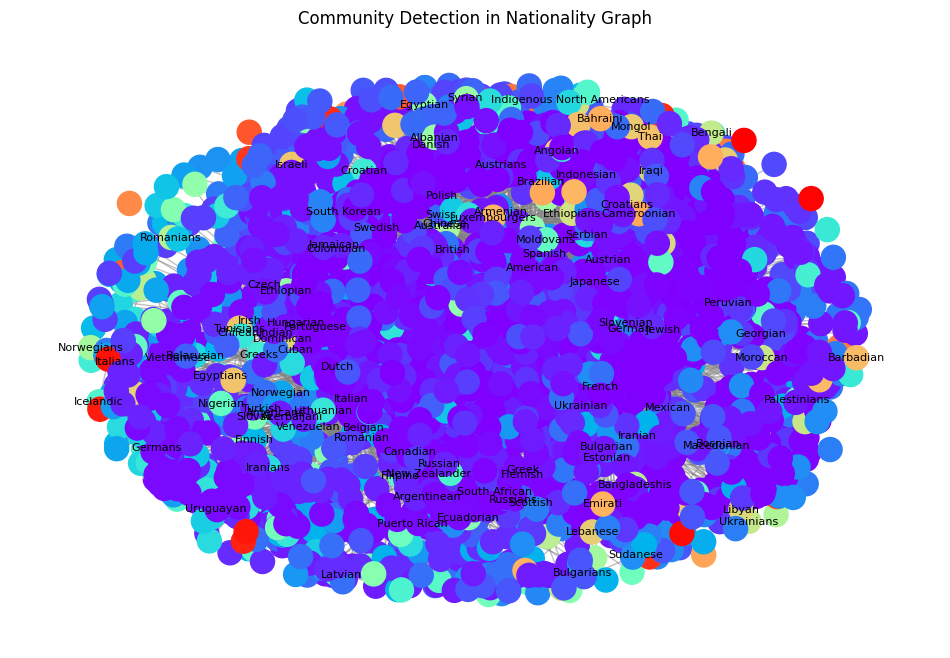

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a directed graph
G = nx.DiGraph()

# Step 1: Add nationality nodes and artist-nationality edges
for _, row in artists_df_cleaned.iterrows():
    artist = row['artistUrl']
    nationality = row['nation']

    # Add artist node
    G.add_node(artist, type='artist')

    # Add nationality node if it doesn't exist and exclude 'Unknown'
    if nationality not in G and nationality != 'Unknown':
        G.add_node(nationality, type='nationality')

    # Add edge from artist to nationality if not 'Unknown'
    if nationality != 'Unknown':
        G.add_edge(artist, nationality, relationship='from_nationality')

# Step 2: Convert to undirected graph for community detection
undirected_G = G.to_undirected()

# Step 3: Perform community detection using the greedy modularity algorithm
communities = list(nx.algorithms.community.greedy_modularity_communities(undirected_G))

# Step 4: Print nationalities and associated artists in each community
for i, community in enumerate(communities):
    # Create a list to store the nationality and artists
    community_artists = {}
    for node in community:
        if G.nodes[node].get('type') == 'nationality':
            nationality = node
            # Find all artists connected to this nationality
            connected_artists = list(G.predecessors(nationality))  # Get artists connected to this nationality
            community_artists[nationality] = connected_artists

    print(f"\nCommunity {i + 1}:")
    for nationality, artists in community_artists.items():
        print(f"  Nationality: {nationality}")
        print(f"  Artists: {', '.join(artists)}")

# Optional: Visualization of nationality communities
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(undirected_G, k=0.15)  # Layout for better spacing
color_map = []

for node in undirected_G.nodes():
    for i, community in enumerate(communities):
        if node in community:
            color_map.append(i)  # Assign color based on community index
            break
    else:
        color_map.append(-1)  # For nodes not in any community


# Draw nodes
nx.draw_networkx_nodes(undirected_G, pos, node_color=color_map, cmap=plt.cm.rainbow, node_size=300)
nx.draw_networkx_edges(undirected_G, pos, edge_color='gray', alpha=0.5)

# Draw labels for nationalities
nationality_labels = {node: node for node in undirected_G.nodes() if G.nodes[node].get('type') == 'nationality'}
nx.draw_networkx_labels(undirected_G, pos, labels=nationality_labels, font_size=8)

# Set plot title and remove axes
plt.title("Community Detection in Nationality Graph")
plt.axis('off')
plt.show()




Node with the most edges: American with 520 edges.


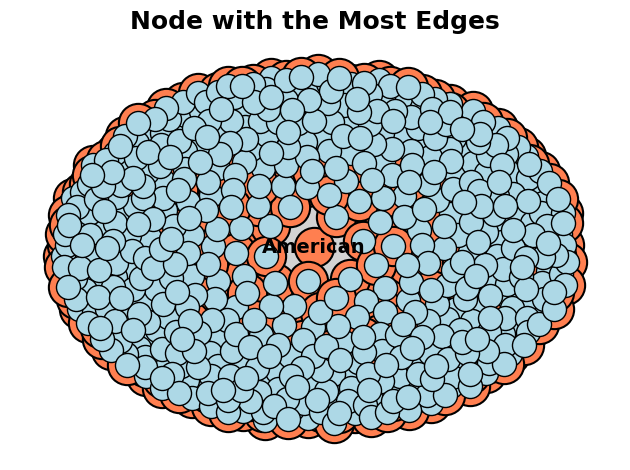

In [117]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a directed graph
G = nx.DiGraph()

# Add nationality nodes and artist-nationality edges
for _, row in artists_df_cleaned.iterrows():
    artist = row['artistUrl']
    nationality = row['nation']

    G.add_node(artist, type='artist')

    if nationality != 'Unknown':
        G.add_node(nationality, type='nationality')
        G.add_edge(artist, nationality, relationship='from_nationality')

# Convert to undirected graph for visualization
undirected_G = G.to_undirected()

# Determine the node with the most edges
degree_dict = dict(undirected_G.degree())
max_node = max(degree_dict, key=degree_dict.get)
print(f"Node with the most edges: {max_node} with {degree_dict[max_node]} edges.")

G_max = nx.Graph()
G_max.add_node(max_node)  # Add the most connected node

# Add edges only related to the max_node
for neighbor in undirected_G.neighbors(max_node):
    G_max.add_node(neighbor)  # Add neighbor nodes
    G_max.add_edge(max_node, neighbor)  # Add edge to the most connected node

# Create a layout for the graph
pos = nx.spring_layout(G_max, seed=42)

for neighbor in G_max.neighbors(max_node):
    pos[neighbor][0] *= 1.5  # Adjust x-position
    pos[neighbor][1] *= 1.5  # Adjust y-position

# Draw the most connected node with a unique color and larger size
nx.draw_networkx_nodes(G_max, pos, node_color='coral', node_size=800, edgecolors='black', linewidths=1.5)

# Draw neighboring nodes smaller
neighbor_nodes = [n for n in G_max.neighbors(max_node)]
nx.draw_networkx_nodes(G_max, pos, nodelist=neighbor_nodes, node_color='lightblue', node_size=300, edgecolors='black')

# Draw edges if any
nx.draw_networkx_edges(G_max, pos, edge_color='lightgray', width=2, alpha=0.7)

# Draw label only for the node with the most edges with a bold font
nx.draw_networkx_labels(G_max, pos, labels={max_node: max_node}, font_size=14, font_weight='bold', font_color='black')

# Set the title and adjust the background color
plt.title("Node with the Most Edges", fontsize=18, fontweight='bold')
plt.gca().set_facecolor('whitesmoke')

# Remove axis for a cleaner look
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Community Detection
communities = list(nx.algorithms.community.greedy_modularity_communities(undirected_G))

# Count the number of communities detected
num_communities = len(communities)
print(f"\nNumber of detected communities among nation: {num_communities}")

# Identify the biggest community
biggest_community = max(communities, key=len)  # Community with the most members
biggest_community_size = len(biggest_community)

print(f"Biggest community among nations (size {biggest_community_size}): {list(biggest_community)}")


Number of detected communities among nation: 138
Biggest community among nations (size 521): ['/en/agnes-lawrence-pelton', '/en/christopher-wilmarth', '/en/peter-max', '/en/yasuo-kuniyoshi', '/en/jack-armstrong', '/en/vincent-giarrano', '/en/richard-tuttle', '/en/julian-stanczak', '/en/brice-marden', '/en/nancy-graves', '/en/emil-carlsen', '/en/barnett-newman', '/en/david-lynch', '/en/arthur-beecher-carles', '/en/rochelle-blumenfeld', '/en/steve-wheeler', '/en/frank-mason', '/en/jean-michel-basquiat', '/en/cassius-marcellus-coolidge', '/en/marcia-hafif', '/en/karl-schrag', '/en/haddon-sundbloom', '/en/maxfield-parrish', '/en/laddie-john-dill', '/en/james-weeks', '/en/russ-warren', '/en/maurice-prendergast', '/en/frederic-edwin-church', '/en/rudolf-de-crignis', '/en/william-michael-harnett', '/en/james-mcneill-whistler', '/en/rosemarie-beck', '/en/al-held', '/en/edwin-lord-weeks', '/en/robert-swain', '/en/ronald-bladen', '/en/gandy-brodie', '/en/richard-anuszkiewicz', '/en/robert-cotti

In [100]:
import pandas as pd
import networkx as nx

# Assuming G is already defined and populated as in your previous code
# Step 1: Calculate degree centrality for nationalities
degree_centrality = nx.degree_centrality(G)

# Step 2: Prepare a DataFrame for nationalities and their artist counts
nationality_count = {}
for artist, attr in G.nodes(data=True):
    if attr.get('type') == 'artist':
        # Find the nationality this artist connects to
        for neighbor in G.neighbors(artist):
            if G.nodes[neighbor].get('type') == 'nationality' and neighbor != 'Unknown':
                nationality = neighbor
                nationality_count[nationality] = nationality_count.get(nationality, 0) + 1

# Step 3: Convert nationality count to DataFrame
nationality_df = pd.DataFrame(nationality_count.items(), columns=['Nationality', 'Artist Count'])

# Step 4: Sort the DataFrame by the number of artists and get the top nationalities
top_nationalities = nationality_df.sort_values(by='Artist Count', ascending=False).head(10)

# Step 5: Print the top 10 nationalities with their centrality scores
print("Top 10 Nationalities with Centrality Scores:")
for nationality, count in top_nationalities.itertuples(index=False):
    centrality_score = degree_centrality.get(nationality, 0)
    print(f"Nationality: {nationality}, Number of Artists: {count}, Centrality Score: {centrality_score:.4f}")


Top 10 Nationalities with Centrality Scores:
Nationality: American, Number of Artists: 520, Centrality Score: 0.2532
Nationality: French, Number of Artists: 402, Centrality Score: 0.1957
Nationality: Italian, Number of Artists: 269, Centrality Score: 0.1310
Nationality: British, Number of Artists: 249, Centrality Score: 0.1212
Nationality: German, Number of Artists: 160, Centrality Score: 0.0779
Nationality: Russian, Number of Artists: 108, Centrality Score: 0.0526
Nationality: Dutch, Number of Artists: 105, Centrality Score: 0.0511
Nationality: Spanish, Number of Artists: 87, Centrality Score: 0.0424
Nationality: Romanian, Number of Artists: 78, Centrality Score: 0.0380
Nationality: Japanese, Number of Artists: 67, Centrality Score: 0.0326
